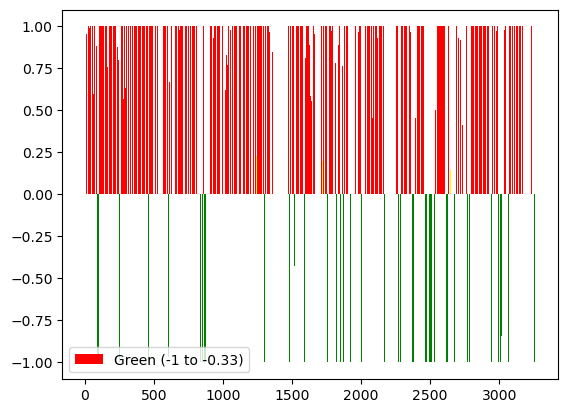

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('./EveryAppleRipeness.csv')

# 设置区间边界
bins = [-1, -0.33, 0.33, 1]

# 使用np.digitize将数据分到不同的区间
digitized = np.digitize(data['Ripeness'], bins)

# 根据不同区间设置颜色
colors = ['green' if x == 1 else 'yellow' if x == 2 else 'red' for x in digitized]

# 绘制直方图
plt.bar(np.arange(len(data['Ripeness'])), data['Ripeness'], color=colors)

# 显示图例
plt.legend(['Green (-1 to -0.33)', 'Yellow (-0.33 to 0.33)', 'Red (0.33 to 1)'])

# 显示图形
plt.show()


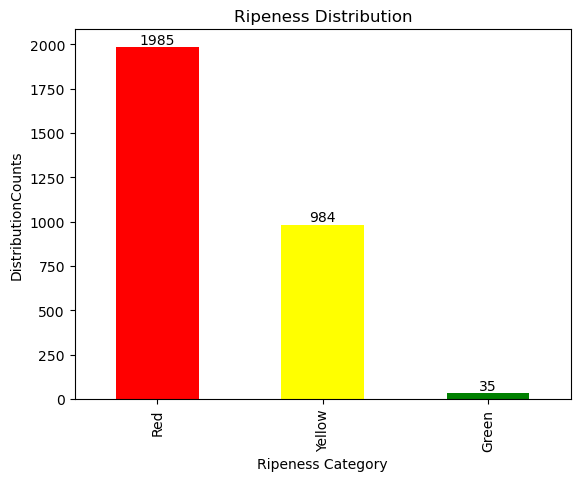

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 读取数据
data = pd.read_csv('./EveryAppleRipeness.csv')

# 将Ripeness值分为三类
bins = [-1, -0.33, 0.33, 1]
labels = ['Green', 'Yellow', 'Red']
data['Ripeness_Category'] = pd.cut(data['Ripeness'], bins=bins, labels=labels)

# 统计每一类的数量
ripness_counts = data['Ripeness_Category'].value_counts()

# 绘制直方图
colors = {'Green': 'green', 'Yellow': 'yellow', 'Red': 'red'}
ax = ripness_counts.plot(kind='bar', color=[colors[key] for key in ripness_counts.index])

# 设置图表标题和标签
plt.title('Ripeness Distribution')
plt.xlabel('Ripeness Category')
plt.ylabel('DistributionCounts')

# 显示每个直方图在Y轴所对应的值
for i, v in enumerate(ripness_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.savefig('Question3_1.png',dpi=1200)
# 显示图表
plt.show()

,FoldNames,JpgNames,Ripeness
0,1,cropped_0.0_105_93_55_51.jpg,0.967254
1,1,cropped_0.0_118_0_36_17.jpg,1.000000
2,1,cropped_0.0_119_156_35_26.jpg,1.000000
3,1,cropped_0.0_125_74_42_32.jpg,1.000000
4,2,cropped_0.0_147_60_11_15.jpg,0.000000
...,...,...,...
3260,200,cropped_0.0_44_76_17_13.jpg,0.000000
3261,200,cropped_0.0_54_94_23_17.jpg,0.000000
3262,200,cropped_0.0_58_77_14_11.jpg,0.000000
3263,200,cropped_0.0_73_70_29_22.jpg,0.000000


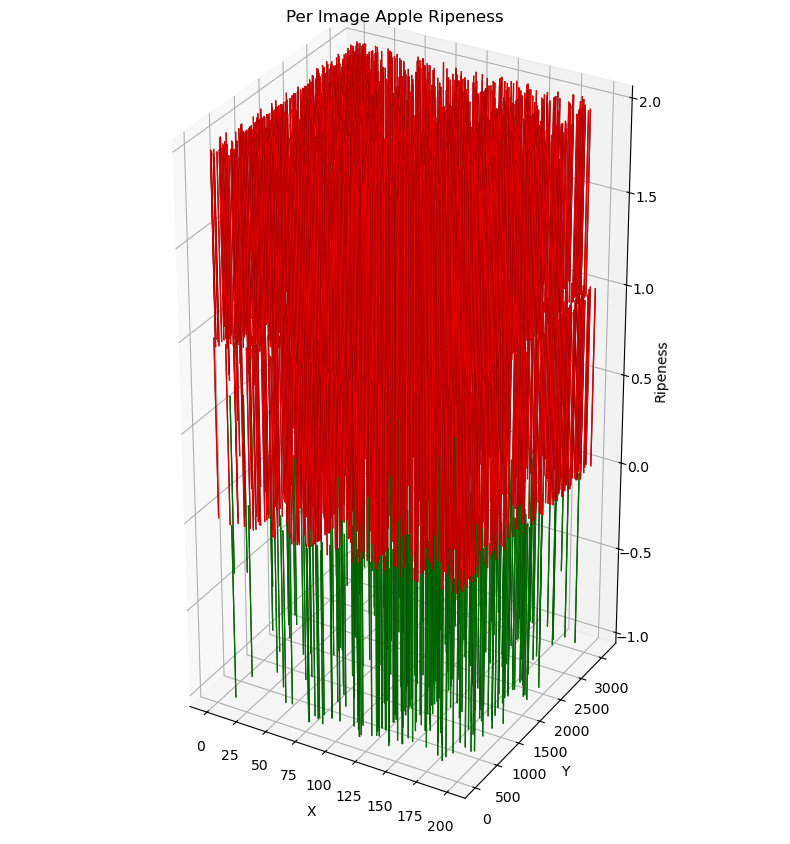

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

# 读取CSV数据
data = pd.read_csv('./EveryAppleRipeness.csv')

# 使用LabelEncoder将分类数据转换为数值
lc = LabelEncoder()
data['FoldNames'] = lc.fit_transform(data['FoldNames'])
data['JpgNames'] = lc.fit_transform(data['JpgNames'])

# 创建3D图表
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 根据'Ripeness'的值选择颜色
colors = np.where(data['Ripeness'] >= 0, 'r', 'g')

# 使用ax.bar3d绘制三维柱状图，设置颜色
bars = ax.bar3d(x=data['FoldNames'], y=data['JpgNames'], z=data['Ripeness'],
                dx=1, dy=1, dz=1, color=colors)

# 设置图表标题和轴标签
ax.set_title("Per Image Apple Ripeness")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Ripeness')
ax.set_box_aspect([1, 1, 2])
plt.savefig('Question3.png',dpi=1200)
plt.show()